# Github Book Reccomendation System

https://github.com/mujtabaali02/Book-Recommendation-System/blob/master/Book_Recommendation_Syatem.ipynb

# Load and Read Data

In [2]:
# Import pandas and numpy for loading, reading, and data preprocessing
import pandas as pd
import numpy as np

# Load and read datasets
books_data = pd.read_csv('Books.csv')
ratings_data = pd.read_csv('Ratings.csv')
user_data = pd.read_csv('Users.csv')

<ipython-input-2-848b6bcec4eb>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv('Books.csv')


# Initial Data Analysis

In [3]:
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# View how many rows and columns
print(books_data.shape)
print(ratings_data.shape)
print(user_data.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
# View how many rows and columns
print(books_data.shape)
print(ratings_data.shape)
print(user_data.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
# Check data type and if columns are correctly typed
print(books_data.dtypes)
print()
print(ratings_data.dtypes)
print()
print(user_data.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

User-ID       int64
Location     object
Age         float64
dtype: object


In [9]:
# Get the number of unique values in each column
print(books_data.nunique())
print()
print(ratings_data.nunique())
print()
print(user_data.nunique())

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

User-ID     278858
Location     57339
Age            165
dtype: int64


In [10]:
# View the frequency of different values
print(books_data['Book-Title'].value_counts().head(10))  # Top 10 most common book titles
print()
print(ratings_data['User-ID'].value_counts().head(10))  # Top 10 most active users
print()
print(user_data['Location'].value_counts().head(10))   # Top 10 locations among users

Book-Title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: count, dtype: int64

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain               

In [11]:
# Check for missing values
print(books_data.isnull().sum())
print()
print(ratings_data.isnull().sum())
print()
print(user_data.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID          0
Location         0
Age         110762
dtype: int64


In [12]:
# Check for duplicates
print(books_data.duplicated().sum())
print(ratings_data.duplicated().sum())
print(user_data.duplicated().sum())

0
0
0


In [13]:
# Summary statistics
print(books_data.describe())
print()
print(ratings_data.describe())
print()
print(user_data.describe())

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq          

In [14]:
# Drop the non-numeric columns for correlation analysis
ratings_numeric = ratings_data.drop(columns=['ISBN'])

# Calculate the correlation for numeric columns only
correlation_matrix = ratings_numeric.corr()

# Print correlation matrix
print(correlation_matrix)

              User-ID  Book-Rating
User-ID      1.000000    -0.046944
Book-Rating -0.046944     1.000000


# Data Preprocessing

Handling Missing Values and Cleaning the Data -- Users, Books, Ratings

In [15]:
# For User Data missing values are in the age column:

# Calculate the median of the Age column, excluding missing values
median_age = user_data['Age'].median()

# Fill missing values in the Age column with the median value
user_data['Age'].fillna(median_age, inplace=True)

# Verify that there are no more missing values in the Age column
print(user_data['Age'].isnull().sum())

0


<ipython-input-15-1da5eb2f9a8e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_data['Age'].fillna(median_age, inplace=True)


In [16]:
#Capping the outlier rows with Percentiles
upper_lim = user_data['Age'].quantile(.95)
lower_lim = user_data['Age'].quantile(.05)
user_data.loc[(user_data["Age"] > upper_lim),"Age"] = upper_lim
user_data.loc[(user_data["Age"] < lower_lim),"Age"] = lower_lim

In [17]:
user_data['Age'].describe()

,Age
count,278858.000000
mean,33.402570
std,9.523058
min,18.000000
25%,29.000000
50%,32.000000
75%,35.000000
max,56.000000


In [18]:
# For Book Data missing values are book author and publisher:

# Fill missing values in the Book-Author column with a placeholder
books_data['Book-Author'].fillna('Unknown Author', inplace=True)

# Fill missing values in the Publisher column with a placeholder
books_data['Publisher'].fillna('Unknown Publisher', inplace=True)

# Verify that there are no more missing values in the relevant columns
print(books_data[['Book-Author', 'Publisher']].isnull().sum())

Book-Author    0
Publisher      0
dtype: int64


<ipython-input-18-27f384dab58c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_data['Book-Author'].fillna('Unknown Author', inplace=True)
<ipython-input-18-27f384dab58c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [19]:
# Book Data (continued), year of publication is an object and inconsistant for further EDA:
books_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [21]:
# Convert years from objects to integers
# Convert invalid entries to NaN
books_data['Year-Of-Publication'] = pd.to_numeric(books_data['Year-Of-Publication'], errors='coerce')

# Fill NaN values with with 0
books_data['Year-Of-Publication'].fillna(0, inplace=True)

# Verify the conversion
print(books_data['Year-Of-Publication'].dtype)

float64


<ipython-input-21-6fae739be514>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_data['Year-Of-Publication'].fillna(0, inplace=True)


In [22]:
# Calculate the upper and lower limits for capping the outliers
upper_lim = 2024  # Set the upper limit to 2024
lower_lim = books_data['Year-Of-Publication'].quantile(0.05)  # 5th percentile

# Cap the outlier rows
books_data.loc[books_data['Year-Of-Publication'] > upper_lim, 'Year-Of-Publication'] = upper_lim
books_data.loc[books_data['Year-Of-Publication'] < lower_lim, 'Year-Of-Publication'] = lower_lim

# Verify the changes
print(books_data['Year-Of-Publication'].describe())

count    271360.000000
mean       1993.610661
std           7.651836
min        1976.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2024.000000
Name: Year-Of-Publication, dtype: float64


# Merging the Datasets

For further and consistant EDA and creation of the recommendation system

In [23]:
# Merge users and rating dataframe using the User-ID as the key identifier
users_ratings_df = pd.merge(user_data,ratings_data, on='User-ID')

In [25]:
# Merge combined data of users and ratings with books data with ISBN as key identifier
merged_df = pd.merge(books_data,users_ratings_df, on='ISBN')

In [26]:
# Verify all 3 dataframes merged correctly
merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,0


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  float64
 4   Publisher            1031136 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Location             1031136 non-null  object 
 10  Age                  1031136 non-null  float64
 11  Book-Rating          1031136 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 94.4+ MB


In [28]:
# Drop unnecessary features
merged_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,0


# Exploratory Data Analysis

Ratings per Book

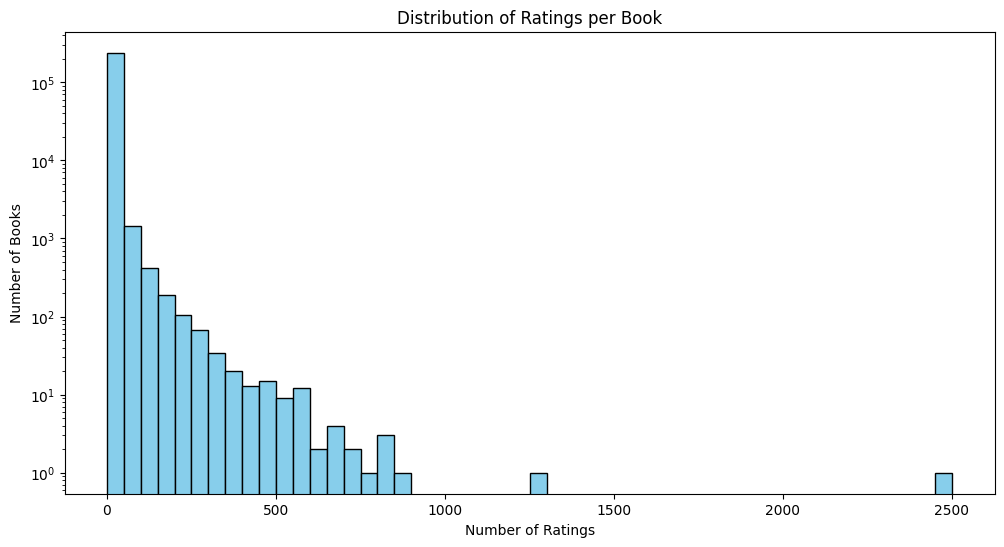

In [29]:
#Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Book-Title' and count the number of ratings for each book
ratings_per_book = merged_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
ratings_per_book.columns = ['Book-Title', 'Num-Ratings']

# Sort the books by the number of ratings in descending order
ratings_per_book = ratings_per_book.sort_values(by='Num-Ratings', ascending=False)

# Plot the distribution of ratings per book
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_book['Num-Ratings'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.title('Distribution of Ratings per Book')
plt.yscale('log')  # Log scale to account for large skew in the data
plt.show()

Top 10 Most Occuring Books

In [30]:
# Get the top 10 most frequently occurring books in the dataset
Top10_Book = merged_df['Book-Title'].value_counts().reset_index().head(10)
Top10_Book.columns = ['Book_Title', 'Count']  # Rename columns appropriately

# Check the column names to ensure they were renamed correctly
print(Top10_Book.columns)

Index(['Book_Title', 'Count'], dtype='object')


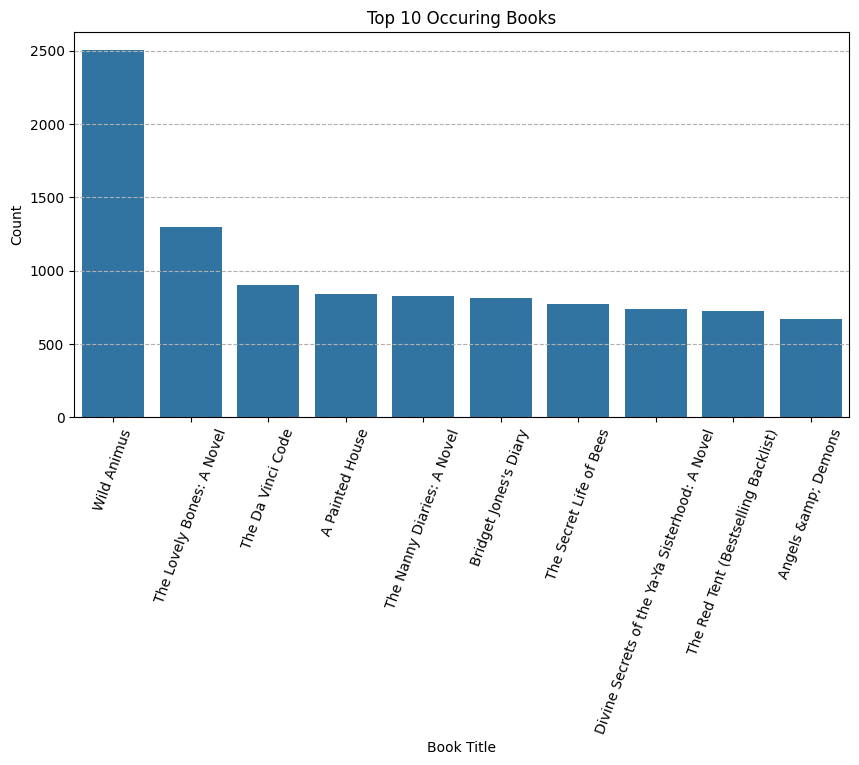

In [31]:
# Plot the barplot for top 10 books
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x='Book_Title', y='Count', data=Top10_Book)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid(axis='y', linestyle='--')
plt.title('Top 10 Occuring Books')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.show()

Top 10 author with most books written

In [32]:
# Create a DataFrame of the top 10 authors based on their book count
Top10_author = merged_df['Book-Author'].value_counts().reset_index().head(10)

# Rename columns to clearly indicate author names and count of books
Top10_author.columns = ['Book-Author', 'Count']

# Display the top 10 authors DataFrame
Top10_author

,Book-Author,Count
0,Stephen King,10053
1,Nora Roberts,8429
2,John Grisham,6010
3,James Patterson,5845
4,Mary Higgins Clark,4777
5,Dean R. Koontz,4313
6,Tom Clancy,4036
7,Danielle Steel,3726
8,Sue Grafton,3457
9,Janet Evanovich,3350


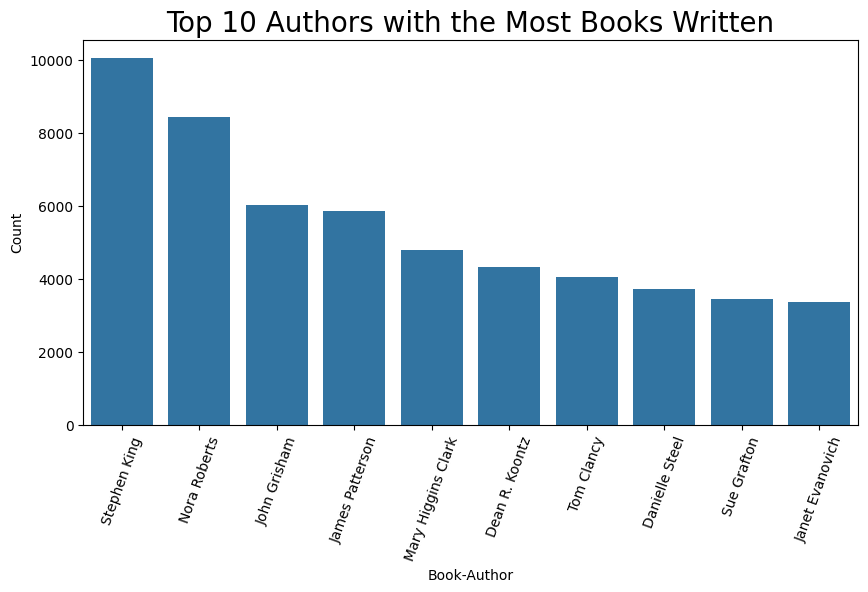

In [33]:
# Create a barplot for the top 10 authors
sns.barplot(x="Book-Author", y="Count", data=Top10_author)

# Rotate x-axis labels for better readability
plt.xticks(rotation=70, horizontalalignment="center")

# Set plot title and font size
plt.title("Top 10 Authors with the Most Books Written", fontsize=20)

# Display the plot
plt.show()

Top 10 Countries of Users

In [34]:
# Import re to leverage regular expressions for extracting the last word of a location string,
# which often represents the country
import re

# Dictionary to map common abbreviations and country names correctly
country_mapping = {
    'usa': 'USA', 'canada': 'Canada', 'kingdom': 'United Kingdom',
    'germany': 'Germany', 'australia': 'Australia', 'spain': 'Spain',
    'france': 'France', 'portugal': 'Portugal', 'uk': 'United Kingdom'
}

# Function to extract and map country name
def extract_country(location):
    # Extract the last word in location string
    country = re.search(r'([a-zA-Z]+)$', location.lower())
    if country:
        country = country.group(1)
        # Use the dictionary to map to correct country name
        return country_mapping.get(country, country.capitalize())
    return 'Unknown'  # For locations that don't match

# Apply the function to create a clean 'Country' column
merged_df['Country'] = merged_df['Location'].apply(extract_country)

In [35]:
# Create dataframe for Top 5 Countries
Top5_Country = merged_df['Country'].value_counts().reset_index().head(5)
Top5_Country.columns = ['Country', 'Count']

In [36]:
# Check the column names to confirm they are correct
print(Top5_Country.columns)
print(Top5_Country.head(5))

Index(['Country', 'Count'], dtype='object')
          Country   Count
0             USA  746467
1          Canada   93001
2  United Kingdom   33072
3         Germany   27657
4         Unknown   24551


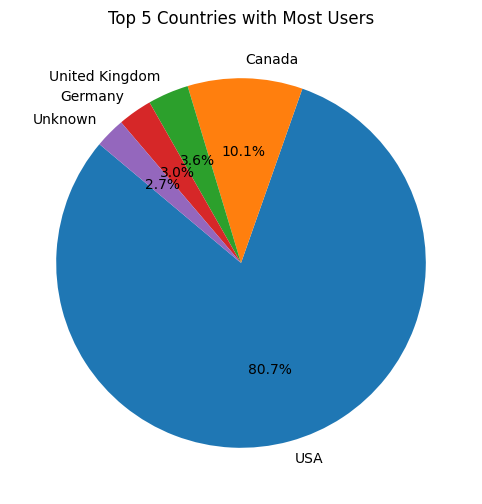

In [37]:
# Pie chart for top 5 countries with most users
plt.figure(figsize=(8, 6))
plt.pie(Top5_Country['Count'], labels=Top5_Country['Country'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries with Most Users")
plt.show()

Correlation Analysis - Numerical Data: Year-Of-Publication, User-ID, Age, and Book-Rating

Correlation Matrix:
                     Year-Of-Publication   User-ID       Age  Book-Rating
Year-Of-Publication             1.000000 -0.008602 -0.009514     0.039285
User-ID                        -0.008602  1.000000 -0.004873    -0.044021
Age                            -0.009514 -0.004873  1.000000    -0.026174
Book-Rating                     0.039285 -0.044021 -0.026174     1.000000


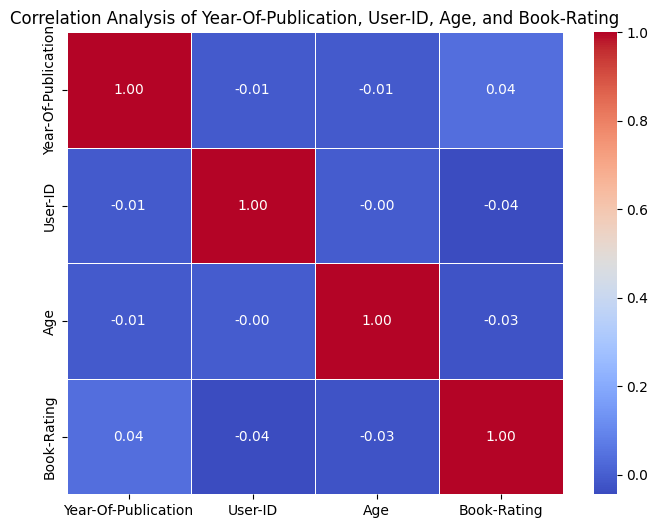

In [38]:
# Import seaborn module for further correlation visulisation
import seaborn as sns

# Extract relevant columns from the merged_df
correlation_data = merged_df[['Year-Of-Publication', 'User-ID', 'Age', 'Book-Rating']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Analysis of Year-Of-Publication, User-ID, Age, and Book-Rating')
plt.show()


Distribution for each Book's Average Rating

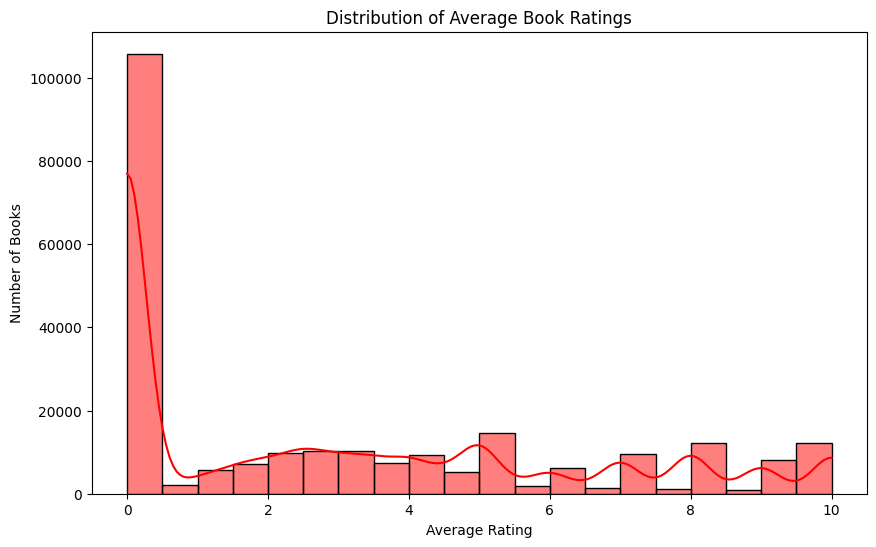

In [39]:
# Calculate average ratings per book
average_ratings = merged_df.groupby('Book-Title')['Book-Rating'].mean()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(average_ratings, bins=20, kde=True, color='red')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Average Book Ratings')
plt.show()

# Building the Collaborative Filtering Models

Collaborative filtering methods Collaborative methods for recommender systems are methods that are based solely on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”.

In [40]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357280 sha256=631efd6e890a329869f266b13a30aef59bfa9395eff512c45e56e839eb127b78
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [41]:
# Import necessary libraries and modules from sci-kit learn to begin building reccomendation model
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import ast
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVDpp, accuracy
from surprise.model_selection import cross_validate
from collections import defaultdict
from surprise import SVDpp
from surprise import SlopeOne, CoClustering

# SVD++ (from Github)

Data Preparation

In [42]:
#Rating head
ratings_data.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [43]:
#Rating data with exclusion of Books with rating 0
ratings = ratings_data[ratings_data['Book-Rating'] != 0]

#Merging dataframe rating and books on ISBN
df = pd.merge(ratings_data,books_data, on='ISBN')

Implementing KNN - Books which are rated by atleast 10 users

In [44]:
# Books interactionn count
books_interactions_count_df = df.groupby(['ISBN', 'User-ID']).size().groupby('ISBN').size()
print('# of books: %d' % len(books_interactions_count_df))

# Books with enough interactions
books_with_enough_interactions_df = books_interactions_count_df[books_interactions_count_df >= 10].reset_index()[['ISBN']]
print('# of books with at least 10 interactions: %d' % len(books_with_enough_interactions_df))
print(books_with_enough_interactions_df.head(5))

# of books: 270151
# of books with at least 10 interactions: 17479
         ISBN
0  0002005018
1  0002251760
2  0002255081
3  0002257203
4  0002259834


Users which have rated atleast 25 different books

In [45]:
# Users interactionn count
users_interactions_count_df = df.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

# Users with enough interactions
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 25].reset_index()[['User-ID']]
print('# of users with at least 25 interactions: %d' % len(users_with_enough_interactions_df))
print(users_with_enough_interactions_df.head(5))

# of users: 92106
# of users with at least 25 interactions: 5541
   User-ID
0      242
1      243
2      254
3      383
4      392


In [46]:
# Users with enough interactions
print('# of interactions: %d' % len(df))
interactions_from_selected_users_df = df.merge(users_with_enough_interactions_df,
               how = 'right',
               on = 'User-ID')
print('# of interactions from users with at least 25 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 1031136
# of interactions from users with at least 25 interactions: 776280


Dataframe of Users and Books with enough interactions

In [47]:
# Users and Books with enough interactions
print('# of interactions: %d' % len(df))
interactions_from_selected_books_and_users_df= interactions_from_selected_users_df.merge(books_with_enough_interactions_df, on = 'ISBN')
print('# of interactions from users with at least 25 interactions and books with at least 10 interactions: %d' % len(interactions_from_selected_books_and_users_df))

# of interactions: 1031136
# of interactions from users with at least 25 interactions and books with at least 10 interactions: 377522


In [48]:
# Interactions from selected books and users dataframe
interactions_from_selected_books_and_users_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,242,0553278223,10,The Martian Chronicles,RAY BRADBURY,1984.0,Spectra,http://images.amazon.com/images/P/0553278223.0...,http://images.amazon.com/images/P/0553278223.0...,http://images.amazon.com/images/P/0553278223.0...
1,242,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,242,3257208626,8,Fahrenheit 451,Ray Bradbury,1994.0,Distribooks Inc,http://images.amazon.com/images/P/3257208626.0...,http://images.amazon.com/images/P/3257208626.0...,http://images.amazon.com/images/P/3257208626.0...
3,242,3257233051,9,Veronika Deschliesst Zu Sterben / Vernika Deci...,Paolo Coelho,2002.0,Distribooks,http://images.amazon.com/images/P/3257233051.0...,http://images.amazon.com/images/P/3257233051.0...,http://images.amazon.com/images/P/3257233051.0...
4,242,3492045642,8,QuerschÃ?Â¼sse - Downsize This!,Michael Moore,2003.0,Piper,http://images.amazon.com/images/P/3492045642.0...,http://images.amazon.com/images/P/3492045642.0...,http://images.amazon.com/images/P/3492045642.0...


In [49]:
# Shape of interactions from selected books and users dataframe
interactions_from_selected_books_and_users_df.shape

(377522, 10)

In [50]:
# Aggregate all the interactions of users and applying log transformation to rating
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df1 = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df1))
interactions_full_df = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(5)

# of unique user/item interactions: 374843
# of unique user/item interactions: 377522


,User-ID,ISBN,Book-Rating
0,242,0553278223,3.459432
1,242,0971880107,0.000000
2,242,3257208626,3.169925
3,242,3257233051,3.321928
4,242,3492045642,3.169925


In [51]:
#Create a sparse pivot table

df_user_item_matrix = interactions_full_df.pivot(index='ISBN',columns='User-ID',values='Book-Rating').fillna(0)
user_item_matrix_sparse = csr_matrix(df_user_item_matrix.values)
df_user_item_matrix1 = interactions_full_df1.pivot(index='User-ID',columns='Book-Title',values='Book-Rating').fillna(0)
df_user_item_matrix1=df_user_item_matrix1.transpose()
user_item_matrix_sparse1 = csr_matrix(df_user_item_matrix1.values)
user_item_matrix_sparse1=csr_matrix(df_user_item_matrix1.values)

Model Building

In [52]:
#Fitting Model
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)

model.fit(user_item_matrix_sparse1)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

Recommendations for randomly selected book

In [53]:
query_index = np.random.choice(df_user_item_matrix1.shape[0])
distances, indices = model.kneighbors(df_user_item_matrix1.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 16)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Book {0}:\n'.format(df_user_item_matrix1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_user_item_matrix1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Book The Fencing Master:

1: Death at Sandringham House (Her Majesty Investigates), with distance of 0.5152658088978588:
2: Countess Misbehaves, with distance of 0.5152658088978588:
3: Letters of Abelard and Heloise, The, with distance of 0.5152658088978588:
4: Pilgrim, with distance of 0.5622414056630171:
5: First Things First: To Live, to Love, to Learn, to Leave a Legacy, with distance of 0.5825220983390244:
6: Enigma, with distance of 0.6381325419809131:
7: The Day the Rabbi Resigned, with distance of 0.6391822124420522:
8: Spock's World (Star Trek: The Original Series), with distance of 0.639385284637771:
9: The Portrait of a Lady, with distance of 0.6479347907066313:
10: Falling Stars (Topaz Historical Romances), with distance of 0.6479347907066313:
11: The Man in the Iron Mask (Signet Classics (Paperback)), with distance of 0.6479347907066313:
12: ISHMAEL, with distance of 0.6493117776230638:
13: Naughty, Naughty, with distance of 0.6572411663987001:
14: The 

Recommendations based on a specific book

In [54]:
#Model building and recommendation for perticular book
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)

model.fit(user_item_matrix_sparse)

index_to_book = dict()

df_titles_book = df.set_index('ISBN').loc[df_user_item_matrix.index]

count = 0

for index, row in df_titles_book.iterrows():

    index_to_book[count]=row['Book-Title']

    count +=1


def recommender(model, user_item_matrix_sparse, df_book, number_of_recommendations, book_index):

    main_title = index_to_book[book_index]

    dist, ind = model.kneighbors(user_item_matrix_sparse[book_index], n_neighbors=number_of_recommendations+1)

    dist = dist[0].tolist()

    ind = ind[0].tolist()

    titles = []

    for index in ind:

        titles.append(index_to_book[index])

    recommendations = list(zip(titles,dist))

    # sort recommendations

    recommendations_sorted = sorted(recommendations, key = lambda x:x[1])

    # reverse recommendations, leaving out the first element

    recommendations_sorted.reverse()

    recommendations_sorted = recommendations_sorted[:-1]

    print("Recommendations for Book {}: ".format(main_title))

    count = 0

    for (title, distance) in recommendations_sorted:

        count += 1

        print('{}. {}, recommendation score = {}'.format(count, title, round(distance,5)))

recommender(model, user_item_matrix_sparse, df, 10, 10)

Recommendations for Book Clara Callan: 
1. Out of the Silent Planet, recommendation score = 0.74122
2. Her Highness, My Wife, recommendation score = 0.73858
3. Little Green Men : A Novel, recommendation score = 0.73732
4. See Jane Score (Avon Romance), recommendation score = 0.73373
5. Ophelia Speaks : Adolescent Girls Write About Their Search for Self, recommendation score = 0.73182
6. Politically Correct Bedtime Stories: Modern Tales for Our Life and Times, recommendation score = 0.72072
7. The Writing Life, recommendation score = 0.71505
8. Divine Secrets of the Ya-Ya Sisterhood: A Novel, recommendation score = 0.71243
9. When Strangers Marry, recommendation score = 0.70313
10. Do No Harm, recommendation score = 0.64282


Train Test Split And Model Building for SVD++

In [56]:
# Find the minimum rating in the dataset to understand the lowest possible rating given by users
minimum_rating = min(interactions_full_df['Book-Rating'].values)

# Find the maximum rating in the dataset to understand the highest possible rating given by users
maximum_rating = max(interactions_full_df['Book-Rating'].values)

In [57]:
# Define a Reader object with the rating scale from the dataset to specify the range of ratings
reader = Reader(rating_scale=(minimum_rating, maximum_rating))

# Load the dataset into the Surprise library's format, using only the columns needed: User-ID, ISBN, and Book-Rating
data = Dataset.load_from_df(interactions_full_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [58]:
# Set test set to 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# Use the SVD++ algorithm
algo = SVDpp()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 1.3217
MAE:  1.0275


1.027548656639682

In [59]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,242,0553278223,3.459432


In [64]:
# Example user and ISBN number for predicted rating
user_id = '141430'

isbn = '888791283'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 141430 for movie with id 888791283: 0.96


In [65]:
# Predictions- actual and estimated
predictions

[Prediction(uid=49842, iid='0671673645', r_ui=2.0, est=1.2409011175186366, details={'was_impossible': False}),
 Prediction(uid=60244, iid='0609810103', r_ui=2.321928094887362, est=2.1879842355706436, details={'was_impossible': False}),
 Prediction(uid=230522, iid='0452269121', r_ui=0.0, est=0.6392601295884898, details={'was_impossible': False}),
 Prediction(uid=274308, iid='0440222702', r_ui=0.0, est=0.0, details={'was_impossible': False}),
 Prediction(uid=63243, iid='0446322180', r_ui=0.0, est=0.7130522780826913, details={'was_impossible': False}),
 Prediction(uid=242361, iid='059035342X', r_ui=0.0, est=0.8083512691420449, details={'was_impossible': False}),
 Prediction(uid=174304, iid='038081658X', r_ui=0.0, est=0.4124541752736488, details={'was_impossible': False}),
 Prediction(uid=178223, iid='0743448642', r_ui=0.0, est=0.5606783682336429, details={'was_impossible': False}),
 Prediction(uid=225763, iid='0671019163', r_ui=0.0, est=0.9923120984439737, details={'was_impossible': False

In [66]:
# Visualize the prediction output
actual_ratings = [pred.r_ui for pred in predictions if pred.uid == user_id]
estimated_ratings = [pred.est for pred in predictions if pred.uid == user_id]

# Ensure ratings lists are not empty before plotting
if actual_ratings and estimated_ratings:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actual_ratings, y=estimated_ratings, alpha=0.6)
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Actual vs Predicted Ratings for User {}'.format(user_id))
    plt.grid(True)
    plt.show()
else:
    print("No ratings found for the specified user to visualize.")

No ratings found for the specified user to visualize.


# Incorporating the Diversity Factor using SVD++

In [73]:
# Generate recommendations function for a Specific User
def recommend_books_svdpp(user_id, top_n=10, diversity_factor=0.3):
    """
    Generate book recommendations for a given user using SVD++ and incorporate diversity.

    Parameters:
    - user_id: ID of the user for which to generate recommendations.
    - top_n: Total number of books to recommend.
    - diversity_factor: Percentage of recommendations to replace with diverse suggestions.

    Returns:
    - A DataFrame containing the recommended books with details.
    """
    # Get a list of all unique ISBNs from the original interactions DataFrame
    all_books = interactions_full_df['ISBN'].unique()

    predictions = []
    for book in all_books:
        predictions.append((book, algo.predict(user_id, book).est)) # Use 'algo' instead of 'svdpp'

    # Sort by predicted rating to get top recommendations
    sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    top_recommendations = sorted_predictions[:top_n]

    # Create a DataFrame for the top recommendations
    recommendation_df = pd.DataFrame(top_recommendations, columns=['ISBN', 'Predicted-Rating'])

    # Introduce Diversity by getting less popular books for diversity
    less_popular_books = interactions_full_df['ISBN'].value_counts().tail(50).index
    num_diverse_books = int(diversity_factor * top_n)
    num_top_books = top_n - num_diverse_books

    # Get less popular recommendations
    diverse_recommendations = []
    for book in less_popular_books:
        diverse_recommendations.append((book, algo.predict(user_id, book).est))

    diverse_recommendations = sorted(diverse_recommendations, key=lambda x: x[1], reverse=True)[:num_diverse_books]

    # Combine top recommendations with diverse recommendations
    # Use pd.concat instead of append
    final_recommendations = pd.concat([recommendation_df.head(num_top_books),
                                       pd.DataFrame(diverse_recommendations, columns=['ISBN', 'Predicted-Rating'])])
    final_recommendations = final_recommendations.sample(frac=1).reset_index(drop=True)  # Shuffle the final list

    # Ensure exactly `top_n` recommendations
    final_recommendations = final_recommendations.head(top_n)

    # Merge with book details for additional information
    final_recommendations = final_recommendations.merge(books_data, on='ISBN', how='left')

    return final_recommendations[['Book-Title', 'Book-Author', 'Predicted-Rating']]

In [74]:
# Example usage for a given user
user_id = 141430  # Replace with an actual user ID from the dataset
recommended_books_svdpp = recommend_books_svdpp(user_id, top_n=10, diversity_factor=0.3)

# Display the recommendations
print(recommended_books_svdpp)

                                          Book-Title  \
0                             A Kiss for Little Bear   
1                  Romeo and Juliet (Bantam Classic)   
2                       High Fidelity. (Dt. Ausgabe)   
3           All I Need to Know I Learned from My Cat   
4                                  The Little Prince   
5  Fox in Socks (I Can Read It All by Myself Begi...   
6                 El Perfume: Historia De UN Asesino   
7                            Das Hotel New Hampshire   
8                                               Orfe   
9             Die unendliche Geschichte: Von A bis Z   

                 Book-Author  Predicted-Rating  
0     Else Holmelund Minarik          2.236233  
1        William Shakespeare          2.271127  
2                Nick Hornby          1.459738  
3                Suzy Becker          2.195580  
4  Antoine de Saint-ExupÃ©ry          2.334033  
5                  Dr. Seuss          2.303126  
6            Patrick Suskind          1.